# Curve Fitting using Numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# generate 20 numbers from 0.01 to 3 (both inclusive), >> x
# fix the seed to 42
np.random.seed(42)
x = np.linspace(0.01, 3, 20)
y = np.cos(x) + 0.2*np.random.randn(len(y))

In [41]:
x

array([0.01      , 0.16736842, 0.32473684, 0.48210526, 0.63947368,
       0.79684211, 0.95421053, 1.11157895, 1.26894737, 1.42631579,
       1.58368421, 1.74105263, 1.89842105, 2.05578947, 2.21315789,
       2.37052632, 2.52789474, 2.68526316, 2.84263158, 3.        ])

In [22]:
y

array([ 1.09929283,  0.95837371,  1.07727243,  1.19062676,  0.75557929,
        0.65214118,  0.8940956 ,  0.59673365,  0.2033912 ,  0.25249041,
       -0.10557107, -0.2625809 , -0.27340255, -0.84885835, -0.94407154,
       -0.82962545, -1.02009023, -0.8348265 , -1.13724781, -1.27245324])

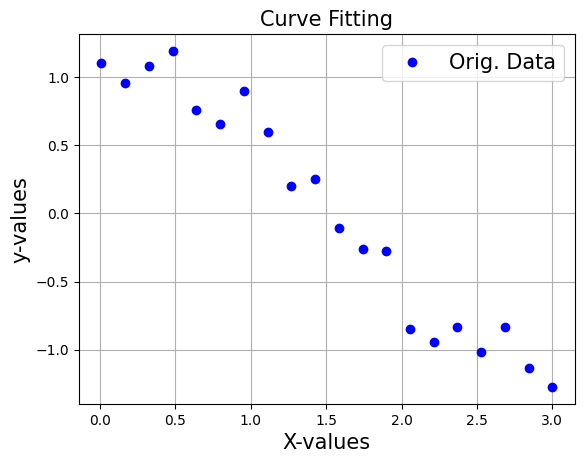

In [23]:
# plot y vs x, using blue color circular markers, no line.
plt.plot(x, y, 'bo', label='Orig. Data')

# assign proper xlables, ylables, legend, grid and plot title
plt.xlabel('X-values', fontsize=15)
plt.ylabel('y-values', fontsize=15)
plt.title('Curve Fitting', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [56]:
# use the numpy polyfit function to do a linear fit
np.polyfit(x,y, 1)  
# the array below represents the polynomial coefficents

array([-0.89928356,  1.36098523])

In [57]:
y_hat = -0.89928356*x + 1.36098523
y_hat

array([ 1.35199239,  1.21047356,  1.06895473,  0.92743589,  0.78591706,
        0.64439822,  0.50287939,  0.36136056,  0.21984172,  0.07832289,
       -0.06319594, -0.20471478, -0.34623361, -0.48775245, -0.62927128,
       -0.77079011, -0.91230895, -1.05382778, -1.19534662, -1.33686545])

In [58]:
p1 = np.poly1d([1, 2, 3])
print(p1) 

   2
1 x + 2 x + 3


In [59]:
# Convert the fitting into a polynomial object, that can be called/evaluated later
p1 = np.poly1d(np.polyfit(x,y, 1))
print(p1)  # equation of the 1D polynomial

 
-0.8993 x + 1.361


In [60]:
type(p1)

numpy.poly1d

In [61]:
y_hat = p1(x)
y_hat

array([ 1.35199239,  1.21047356,  1.06895472,  0.92743589,  0.78591706,
        0.64439822,  0.50287939,  0.36136055,  0.21984172,  0.07832289,
       -0.06319595, -0.20471478, -0.34623361, -0.48775245, -0.62927128,
       -0.77079012, -0.91230895, -1.05382778, -1.19534662, -1.33686545])

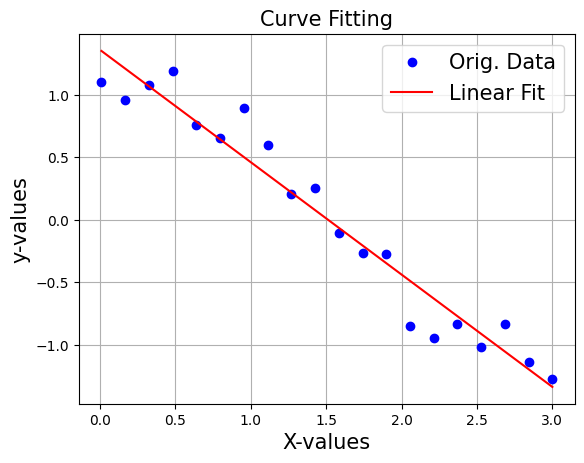

In [62]:
# plot y vs x, using blue color circular markers, no line.
plt.plot(x, y, 'bo', label='Orig. Data')
plt.plot(x, y_hat, 'r-', label='Linear Fit')

# assign proper xlables, ylables, legend, grid and plot title
plt.xlabel('X-values', fontsize=15)
plt.ylabel('y-values', fontsize=15)
plt.title('Curve Fitting', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [63]:
# Evaluate how good is this Linear Fit ???
# Write a Function Calculate the R-square and 
# another function for calculating the MSE for the model

def rsquare(y, y_hat):
    SSR = np.sum((y - y_hat)**2)
    SST = np.sum((y - y.mean())**2)
    return 1- (SSR/SST)

def mse(y, y_hat):
    SSR = np.sum((y - y_hat)**2)
    return (1/len(y))*SSR

In [64]:
rsquare(y, y_hat)

0.9468708391797274

In [65]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.9468708391797274

In [66]:
mse(y, y_hat)

0.03736477286642086

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

0.03736477286642086

In [68]:
# Fit a 2-degree polynomial on the same data (x,y)
# plot it. (orig data + linear fit + 2-deg poly fit)
# r_sq and mse for this 2-deg poly fit

p2 = np.poly1d(np.polyfit(x,y, 2))
print(p2)

y_hat2 = p2(x)
rsquare(y, y_hat2), mse(y, y_hat2)

          2
-0.04235 x - 0.7718 x + 1.3


(0.9482435645872174, 0.03639936004478159)

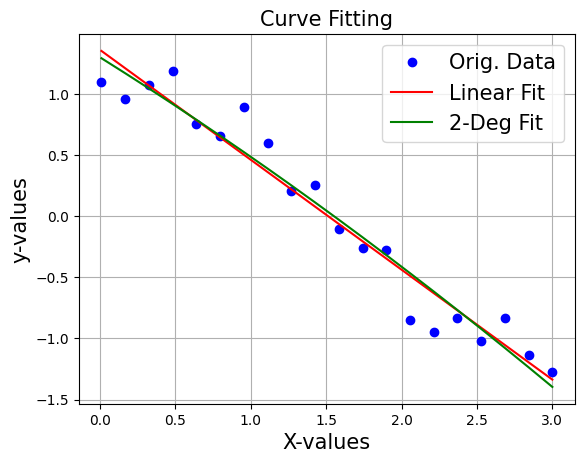

In [83]:
plt.plot(x, y, 'bo', label='Orig. Data')
plt.plot(x, y_hat, 'r-', label='Linear Fit')

plt.plot(x, y_hat2, 'g-', label='2-Deg Fit')

plt.xlabel('X-values', fontsize=15)
plt.ylabel('y-values', fontsize=15)
plt.title('Curve Fitting', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [90]:
p3 = np.poly1d(np.polyfit(x,y, 19))
print(p3)

y_hat3 = p3(x)
rsquare(y, y_hat3), mse(y, y_hat3)

        19         18        17             16             15
-16.43 x  + 385.1 x  - 3983 x  + 2.342e+04 x  - 8.156e+04 x 
              14            13             12             11
 + 1.356e+05 x  + 1.71e+05 x  - 1.745e+06 x  + 5.577e+06 x 
              10             9             8             7            6
 - 1.127e+07 x  + 1.614e+07 x - 1.699e+07 x + 1.326e+07 x - 7.64e+06 x
              5             4             3             2
 + 3.189e+06 x - 9.328e+05 x + 1.802e+05 x - 2.061e+04 x + 1091 x - 7.919


C:\Users\Prashant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.9998068450021608, 0.00013584239823945737)

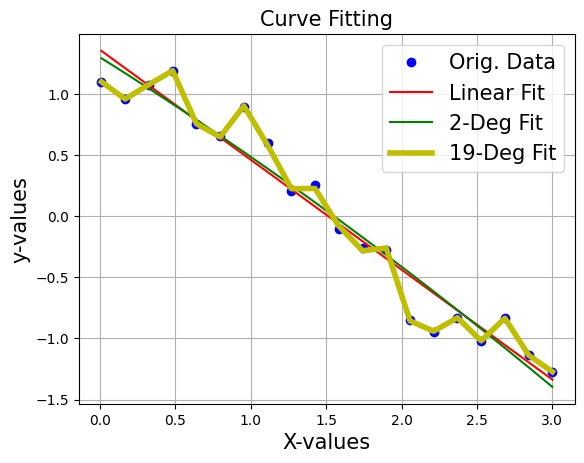

In [92]:
plt.plot(x, y, 'bo', label='Orig. Data')
plt.plot(x, y_hat, 'r-', label='Linear Fit')

plt.plot(x, y_hat2, 'g-', label='2-Deg Fit')
plt.plot(x, y_hat3, 'y-', lw=4, label='19-Deg Fit')

plt.xlabel('X-values', fontsize=15)
plt.ylabel('y-values', fontsize=15)
plt.title('Curve Fitting', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

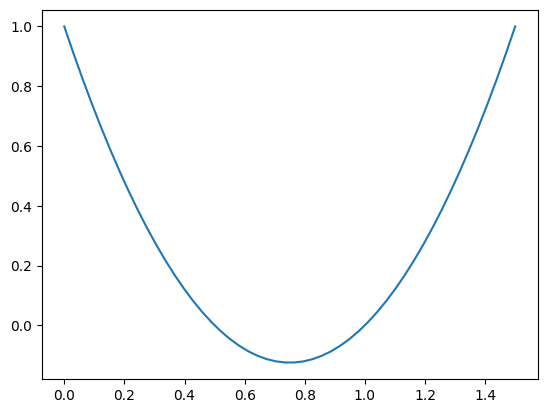

In [86]:
f = lambda x: 2*x**2 - 3*x + 1
x = np.linspace(0,1.5,50)
plt.plot(x, f(x))